疫情数据logistic拟合

          id  confirmedCount  confirmedIncr  curedCount  curedIncr  \
14099  14100           84729             58       79906          3   
14100  14101           84778             49       79913          7   
14101  14102           84823             45       79922          9   
14102  14103           84867             44       79926          4   
14103  14104           84903             36       79944         18   

       currentConfirmedCount  currentConfirmedIncr    dateId  deadCount  \
14099                    178                    55  20200613       4645   
14100                    220                    42  20200614       4645   
14101                    256                    36  20200615       4645   
14102                    296                    40  20200616       4645   
14103                    314                    18  20200617       4645   

       deadIncr  suspectedCount  suspectedCountIncr countryName  \
14099         0            1827                  19          

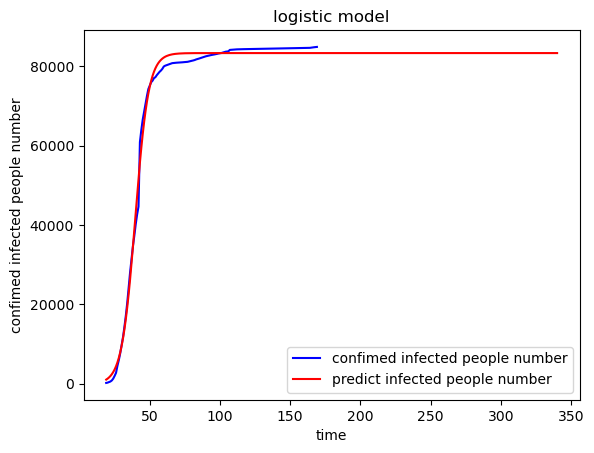

In [9]:
import numpy as np
import matplotlib.pyplot as plt
# import 导入 pyplot 库,并设置一个别名 plt:import matplotlib.pyplotas plt这样我们就可以使用 plt 来引用 Pyplot 包的方法
import math
import pandas as pd
from scipy.optimize import curve_fit

def logistic_increase_function(t,K,P0,r,t0=0):
    #t:time   t0:initial time    P0:initial_value
    #K:capacity  r:increase_rate
    exp_value=np.exp(r*(t-t0))
    return (K*exp_value*P0)/(K+(exp_value-1)*P0)


n = "countrydata.csv"
data =  pd.read_csv(n)

data = data[data['countryName'] == '中国']
print(data.tail())
date_list = list(data['dateId'])
#print(date_list) #日期类型数据列表
date_list = list(map(lambda x:str(x),date_list))
#map() 会根据提供的函数对指定序列做映射。list-->字符串列表.这里 使用 lambda 匿名函数
#说明：函数是匿名的：所谓匿名函数，通俗地说就是没有名字的函数。
#datelist映射成“日期字符串”列表
#print(date_list)
confirm_list = list(data['confirmedCount'])
#print(confirm_list)

# 用最小二乘法估计
#中国数据从19号开始
time_array = np.array(range(19,len(date_list)+19))

#151天数据拟合 csv表格中所有数据做拟合

print(len(date_list))
long_time_array = np.array(range(19,len(date_list)+190))

#预测后面190天疫情 （表格里面暂时没有）

confirm_array = np.array(confirm_list)

 #拟合 K  P0, r
#param_bounds=([0,0,0],[np.inf,np.inf,1])#设定3个参数下界和上界。

param_bounds=([-np.inf,-np.inf,0],[np.inf,np.inf,1])#设定3个参数下界和上界。
popt, pcov = curve_fit(logistic_increase_function, time_array, confirm_array,bounds=param_bounds)
## 返回值
#popt: 数组，参数的最佳值，以使的平方残差之和最小
#pcov: 二维阵列，popt的估计协方差。对角线提供参数估计的方差。
#获取popt里面拟合系数
print("K:capacity  P0:initial_value   r:increase_rate")
print(popt)
#预测
P_predict = logistic_increase_function(long_time_array,popt[0],popt[1],popt[2])#根据拟合的参数预测后面190天

#绘图
%matplotlib inline
plot1 = plt.plot(time_array, confirm_array, 'b',label="confimed infected people number")
plot2 = plt.plot(long_time_array, P_predict, 'r',label='predict infected people number')
plt.xlabel('time')
plt.ylabel('confimed infected people number')
plt.title('logistic model')

plt.legend(loc=0) #指定legend的位置

print(logistic_increase_function(np.array(28),popt[0],popt[1],popt[2]))
print(logistic_increase_function(np.array(29),popt[0],popt[1],popt[2]))
plt.show ()